# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:**Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 20/12/2020.

**Tema:** Examen de Simulación.

# TENER EN CUENTA 

LA API DE TWITER TIENE ALGUNAS LIMITACIONES.

Se puede procesar:

- 180 requerimientos cada 15 minutos.

- TWITER SEARCH: 450 tweets por requerimiento.

- USUARIO: 900 usuarios por requerimiento

- TIMELINES: 1500 tweets por requerimiento, Solo se puede sacar los últimos 3200 Tweets (incluye los retweets).


In [244]:
#Importamos la librerías necesarias.
import tweepy
import json 
import csv
import codecs
from os import remove
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from lmfit.models import StepModel, LinearModel

%matplotlib inline

# AUTENTIFICACION

In [245]:
# Ahora procedemos a autenticarnos usando el API Key, el API secret Key, el Access token y el Access token secret que se generaron al crear nuestra aplicación en Twitter.
consumer_key = "DYQjpGFpIUQaeNnE9cZGnlF2K"
consumer_secret = "9afZW00KEtXTanRq0HfqgOa3oWrlIHTewFcR1ZhuR8w2VDhkcI"
access_token = "773341738194862081-HD9lYWEZ6wuYog8qaMncZvHjnGH3wSc"
access_token_secret = "dBmWe0FyjQFssRbQjc87m8PgDckhponYrkJUy1Q1kAU3p"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [246]:
#Instancio el objeto.
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [247]:
#Obtener mi informacion
me = api.me()
print (json.dumps(me._json,indent=2))

{
  "id": 773341738194862081,
  "id_str": "773341738194862081",
  "name": "Gustavo Guallpa",
  "screen_name": "gguallpa97",
  "location": "Cuenca, Ecuador",
  "profile_location": {
    "id": "013cb38e7fe501ae",
    "url": "https://api.twitter.com/1.1/geo/id/013cb38e7fe501ae.json",
    "place_type": "unknown",
    "name": "Cuenca, Ecuador",
    "full_name": "Cuenca, Ecuador",
    "country_code": "",
    "country": "",
    "contained_within": [],
    "bounding_box": null,
    "attributes": {}
  },
  "description": "LAM \ud83d\ude00A Jes\u00fas por Mar\u00eda \ud83d\ude0dPROVIDA \ud83d\ude4f",
  "url": null,
  "entities": {
    "description": {
      "urls": []
    }
  },
  "protected": true,
  "followers_count": 9,
  "friends_count": 42,
  "listed_count": 0,
  "created_at": "Wed Sep 07 02:06:53 +0000 2016",
  "favourites_count": 34,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": false,
  "statuses_count": 21,
  "lang": null,
  "status": {
    "created_at

# CANDIDATOS A BUSCAR

In [248]:
#candidatos = ['ealbornozv','LourdesCuestaO', 'dorissoliz' ,'ceciline1','AndreGonzalezBe','karlabeltrang']
candidatos = ['ealbornozv','LourdesCuestaO', 'dorissoliz']
candidatos

['ealbornozv', 'LourdesCuestaO', 'dorissoliz']

# FILTRAMOS LOS DATOS.

In [59]:
#remove("candidatos.csv")# Descomentar si se va a elimna para cargar con nuevos datos.
#Seccion de campos a extraer
name, user,follower,text, menciones, likes, hashtags, share = '','', '' ,'','','','',''
#Nombres dentro de csv
rows  = [['Nombre', 'usuario','followers','contenido','menciones','hashtags','likes','veces compartido']]
contador_filas =0
for candidato in candidatos:
    #Obtenemos la informacion del candidato.
    data = api.get_user(candidato)
    print('Datos del candidato: '+ data._json['name'])
    diccionario =data._json['entities'] 
    lista=[]
    
    for link in diccionario :  #recorremos 
        valor = diccionario[link]
        for vrd_valor in valor:
            lista = [lista,valor[vrd_valor]]
        
    new_lista = lista[0]
    listaA=new_lista[1]
    i=0;
    link_candidato=''
    for dia in listaA:
        link = dia
        for links in link:
            i=i+1
            if i == 2:
                link_candidato =link[links]

    print(link_candidato)
    print('Tweets del Candidato.')
    name, user, followers = data._json['name'],data._json['screen_name'],data._json['followers_count']
    print(followers)
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=candidato, tweet_mode = 'extend').items(100):
        diccionario =tweet._json['entities'] 
        hashtags = diccionario['hashtags']
        menciones = diccionario['user_mentions']
        i=0;
        j=0;
        #print('HASHTAGS:')
        users_mnc=''
        hastags=''
        for dia in hashtags:
            hst = dia
            for links in hst:

                i=i+1
                if i == 1:
                    hastags =hst[links]
                    #print(hastags)

        #print('USERS MECIONADOS:')
        for m in menciones:
            mnc = m
           #print(mnc)
            for m_user in mnc:
                j=j+1
                if j == 1:
                    users_mnc=mnc[m_user]
                    #print(mnc[m_user])
        text, menciones, likes,share=tweet._json['text'].encode("utf-8"),users_mnc,tweet._json['favorite_count'],tweet._json['retweet_count']       
        single_row=[name, user, followers, text, menciones,hastags, likes, share]

        rows.append(single_row)
        
with open('candidatos.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

Datos del candidato: Esteban Albornoz
http://www.estebanalbornoz.com
Tweets del Candidato.
35833
Datos del candidato: Lourdes Cuesta Orellana
https://www.facebook.com/LourdesCuestaO/
Tweets del Candidato.
6638
Datos del candidato: Doris Soliz Carrion
http://www.dorissoliz.com
Tweets del Candidato.
128780


# RECUPERAMOS LOS DATOS GUARDADOS DE LOS CANDIDATOS.

In [249]:
#cargamos los datos de entrada
df= pd.read_csv("candidatos.csv", engine='python')

In [250]:
#veamos cuantas dimensiones y registros contiene
df.shape

(300, 8)

In [251]:
#son 300 registros con 8 columnas. Veamos los primeros registros
df.head()

,Nombre,usuario,followers,contenido,menciones,hashtags,likes,veces compartido
0,Esteban Albornoz,ealbornozv,35833,b'Culmina una exitosa semana de actividades en...,DesarrolloEcAN,NaN,2,1
1,Esteban Albornoz,ealbornozv,35833,b'RT @AsambleaEcuador: La Asamblea Nacional se...,AsambleaEcuador,NaN,0,1
2,Esteban Albornoz,ealbornozv,35833,b'RT @ONU_es: La respuesta mundial a la #COVID...,ONU_es,COVID19,0,125
3,Esteban Albornoz,ealbornozv,35833,b'RT @AsambleaEcuador: #SiTeLoPerdiste \n\nEl ...,AsambleaEcuador,SiTeLoPerdiste,0,4
4,Esteban Albornoz,ealbornozv,35833,b'Fruct\xc3\xadfero di\xc3\xa1logo con el medi...,PrensaEc1,NaN,10,4


In [252]:
df.describe()

,followers,likes,veces compartido
count,300.000000,300.000000,300.000000
mean,57083.666667,16.793333,92.826667
std,52166.187785,65.099697,537.768898
min,6638.000000,0.000000,0.000000
25%,6638.000000,0.000000,3.000000
50%,35833.000000,0.000000,7.000000
75%,128780.000000,10.000000,26.000000
max,128780.000000,678.000000,8768.000000


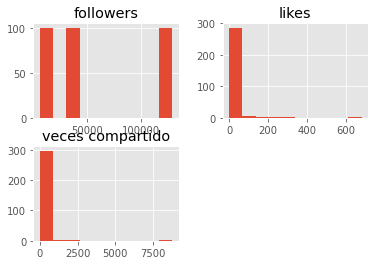

In [253]:
# Visualizamos rápidamente las caraterísticas de entrada
df.drop(['contenido'],1).hist()
plt.show()

<AxesSubplot:xlabel='likes'>

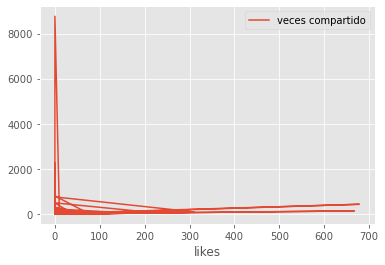

In [254]:
df.plot(x ='likes', y='veces compartido')

# UNA VEZ OBTENIDOS LO DATOS SE PROCECE A HACER LA REGRESION PARA ELLO TOMANDO EN CUANTA LA CANTIDAD DE LIKES HACIENDO SIMIL A LA INTENCION DE VOTOS. 

# PRIMER CANDIDATO

In [255]:
dfA = df[df['Nombre'].isin(['Esteban Albornoz'])] #Filtro la Informacion solo para Esteban Albornoz
dfA

,Nombre,usuario,followers,contenido,menciones,hashtags,likes,veces compartido
0,Esteban Albornoz,ealbornozv,35833,b'Culmina una exitosa semana de actividades en...,DesarrolloEcAN,NaN,2,1
1,Esteban Albornoz,ealbornozv,35833,b'RT @AsambleaEcuador: La Asamblea Nacional se...,AsambleaEcuador,NaN,0,1
2,Esteban Albornoz,ealbornozv,35833,b'RT @ONU_es: La respuesta mundial a la #COVID...,ONU_es,COVID19,0,125
3,Esteban Albornoz,ealbornozv,35833,b'RT @AsambleaEcuador: #SiTeLoPerdiste \n\nEl ...,AsambleaEcuador,SiTeLoPerdiste,0,4
4,Esteban Albornoz,ealbornozv,35833,b'Fruct\xc3\xadfero di\xc3\xa1logo con el medi...,PrensaEc1,NaN,10,4
...,...,...,...,...,...,...,...,...
95,Esteban Albornoz,ealbornozv,35833,b'RT @TvlEcuador: Siga la sesi\xc3\xb3n No. 68...,TvlEcuador,PlenoVirtual,0,1
96,Esteban Albornoz,ealbornozv,35833,b'Se debe poner en el pleno de la @AsambleaEcu...,AsambleaEcuador,NaN,12,10
97,Esteban Albornoz,ealbornozv,35833,b'De manera un\xc3\xa1nime la @DesarrolloEcAN ...,DesarrolloEcAN,NaN,10,7
98,Esteban Albornoz,ealbornozv,35833,b'Gratificante escuchar que la #LeyEmprendimie...,NaN,LeyEmprendimientoeInnovación,22,11


In [256]:
dfA= dfA.loc[:,['likes']] #Selecciono las columnas de analasis
dfA

,likes
0,2
1,0
2,0
3,0
4,10
...,...
95,0
96,12
97,10
98,22


In [257]:
#Creamos una funcion para cargar el numero de dias.
dias=[]
def numeroDias(tamano=100):
    for i in range(tamano):
        dias.append(i)
        #print(i)
    return dias
dias = numeroDias()
np.array(dias)
# = numeroDias()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [258]:
x = np.array(dias)#Cada uno de los días.
#print(x)
y = dfA.loc[:,['likes']]
#print(y)
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))


Ordenada al origen:  [7.78732673]
Pendiente:  [-0.00418842]
Error cuadrático medio: 97.51
Estadístico R_2: 0.00


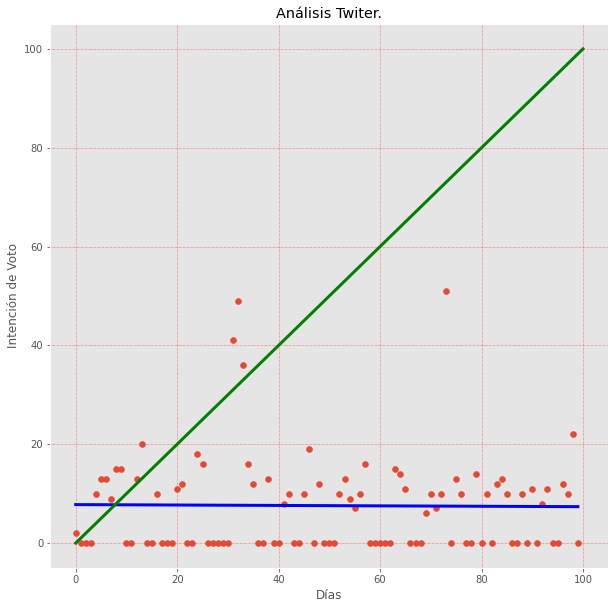

In [260]:
#Graficar
#Tamaño
plt.rcParams['figure.figsize'] = [10, 10]
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='blue',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([0, 100])
y_real = x_real
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Análisis Twiter.')
plt.xlabel('Días')
plt.ylabel('Intención de Voto')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

In [261]:
#Vamos ver el impacto de proximo tuit, haciendo referecnia a personas que votarian debido a que se interesan en sus publicaciones.
impacto = y_pred[100-1]
print('Intención de voto',impacto )

Intención de voto [7.37267327]


# SEGUNDO CANDIDATO

In [262]:
dfC = df[df['Nombre'].isin(['Lourdes Cuesta Orellana'])] #Filtro la Informacion solo para Esteban Albornoz
dfC

,Nombre,usuario,followers,contenido,menciones,hashtags,likes,veces compartido
100,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'RT @ParticipacionPC: #DebateAsamblea21 #Cuen...,ParticipacionPC,DebateAsamblea21,0,1
101,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'RT @ParticipacionPC: #DebateAsamblea21 #Cuen...,ParticipacionPC,DebateAsamblea21,0,1
102,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'RT @ParticipacionPC: #DebateAsamblea21 #Cuen...,ParticipacionPC,DebateAsamblea21,0,2
103,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'RT @ParticipacionPC: Tuvimos nuestro #Debate...,ParticipacionPC,DebateAsamblea21,0,2
104,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'Estamos por iniciar el debate organizado por...,ParticipacionPC,NaN,4,0
...,...,...,...,...,...,...,...,...
195,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'RT @MarcoToro_03: Ma\xc3\xb1ana en el #Di\xc...,MarcoToro_03,Diálogo,0,1
196,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'Inici\xc3\xb3 el juicio pol\xc3\xadtico cont...,NaN,NaN,14,3
197,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'Hoy es el d\xc3\xada mundial de lucha contra...,NaN,CáncerDeMama,7,0
198,Lourdes Cuesta Orellana,LourdesCuestaO,6638,b'Buenos d\xc3\xadas. A partir de las 7:40 est...,radiosonorama,NaN,16,3


In [263]:
dfC= dfC.loc[:,['likes']] #Selecciono las columnas de analasis
dfC

,likes
100,0
101,0
102,0
103,0
104,4
...,...
195,0
196,14
197,7
198,16


In [264]:
#Creamos una funcion para cargar el numero de dias.
dias=[]
def numeroDias(tamano=100):
    for i in range(tamano):
        dias.append(i)
        #print(i)
    return dias
dias = numeroDias()
np.array(dias)
# = numeroDias()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [265]:
x = np.array(dias)#Cada uno de los días.
#print(x)
y = dfC.loc[:,['likes']]
#print(y)
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  [23.86138614]
Pendiente:  [0.05411341]
Error cuadrático medio: 10168.89
Estadístico R_2: 0.00


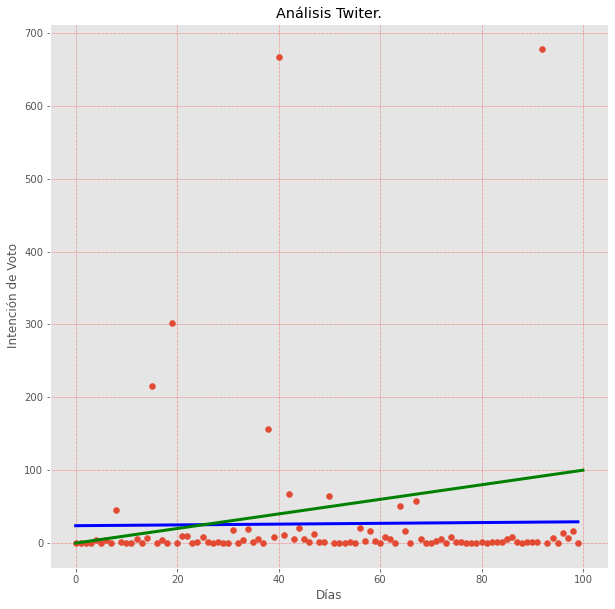

In [266]:
#Graficar
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='blue',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([0, 100])
y_real = x_real
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Análisis Twiter.')
plt.xlabel('Días')
plt.ylabel('Intención de Voto')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

In [267]:
#Vamos ver el impacto de proximo tuit, haciendo referecnia a personas que votarian debido a que se interesan en sus publicaciones.
impacto = y_pred[100-1]
print('Intención de voto',impacto )

Intención de voto [29.21861386]


# TERCER CANDIDATO

In [268]:
dfS = df[df['Nombre'].isin(['Doris Soliz Carrion'])] #Filtro la Informacion solo para Esteban Albornoz
dfS

,Nombre,usuario,followers,contenido,menciones,hashtags,likes,veces compartido
200,Doris Soliz Carrion,dorissoliz,128780,b'Que pronto tengamos la buena noticia de su r...,agustinintriago,NaN,44,8
201,Doris Soliz Carrion,dorissoliz,128780,b'Pronta recuperaci\xc3\xb3n compa\xc3\xb1ero ...,ecuarauz,NaN,169,40
202,Doris Soliz Carrion,dorissoliz,128780,"b'RT @EnClavePolitika: ""#Ecuador tiene una sit...",EnClavePolitika,Ecuador,0,219
203,Doris Soliz Carrion,dorissoliz,128780,b'RT @SaquipayRolando: Con nuestro futuro vice...,SaquipayRolando,CarlosRabascal,0,5
204,Doris Soliz Carrion,dorissoliz,128780,b'RT @KinttoLucas: Un saludo fraterno para los...,KinttoLucas,NaN,0,89
...,...,...,...,...,...,...,...,...
295,Doris Soliz Carrion,dorissoliz,128780,b'RT @MashiRafael: Arauz anuncia un plan efect...,MashiRafael,NaN,0,556
296,Doris Soliz Carrion,dorissoliz,128780,b'RT @IvanAbrilRC: Ratificamos nuestro comprom...,IvanAbrilRC,NaN,0,3
297,Doris Soliz Carrion,dorissoliz,128780,b'RT @esthercuestasan: En el marco de la conme...,esthercuestasan,DiaDeLosDerechosHumanos,0,17
298,Doris Soliz Carrion,dorissoliz,128780,b'RT @sur_gente: \xc2\xa1Nunca m\xc3\xa1s atro...,sur_gente,NaN,0,47


In [269]:
dfS= dfS.loc[:,['likes']] #Selecciono las columnas de analasis
dfS

,likes
200,44
201,169
202,0
203,0
204,0
...,...
295,0
296,0
297,0
298,0


In [270]:
#Creamos una funcion para cargar el numero de dias.
dias=[]
def numeroDias(tamano=100):
    for i in range(tamano):
        dias.append(i)
        #print(i)
    return dias
dias = numeroDias()
np.array(dias)
# = numeroDias()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [271]:
x = np.array(dias)#Cada uno de los días.
#print(x)
y = dfS.loc[:,['likes']]
#print(y)
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  [19.88316832]
Pendiente:  [-0.07319532]
Error cuadrático medio: 2218.05
Estadístico R_2: 0.00


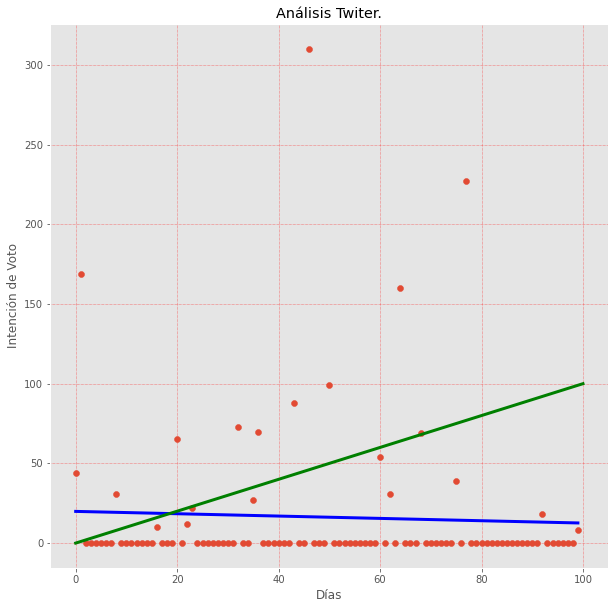

In [272]:
#Graficar
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='blue',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([0, 100])
y_real = x_real
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Análisis Twiter.')
plt.xlabel('Días')
plt.ylabel('Intención de Voto')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

In [273]:
#Vamos ver el impacto de proximo tuit, haciendo referecnia a personas que votarian debido a que se interesan en sus publicaciones.
impacto = y_pred[100-1]
print('Intención de voto',impacto )

Intención de voto [12.63683168]


# SIMULACION DE EVENTOS DISCRETOS.

El candidato ha utilizar es Lourdes Cuesta Orellana, debido a que tiene un mayor impacto en la sociedad, con una mayor intención de voto del:
- 29.21861386

Las Listas son las siguientes>

- 1 -> Esteban Albornoz
- 2 -> Lourdes Cuesta Orellana
- 3 -> Doris Soliz Carrion


In [287]:
import simpy
import random
import matplotlib.pyplot as pp

#Genera numero aleatorio del 1 al 3 de las listas.
import random


% matplotlib inline

# Maximo de votantes que puede recibir el recinto electora.
MAX_VOTANTES = 1
# Total de mesas electorales.
NUM_MESA_ELECTORAL = 1
# Tiempo que tarda una personas en realizar su sufragio(minutos)
TIEMPO_VOTACION = 5
# Intervalo de tiempo en que llegan los votantes (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 35

# Creamos un diccionario para almacenar las horas en que se sufragan los votantes..
votos = {}


class Recinto_Electoral(object):

    def __init__(self, environment, num_mesa_electoral, tiempo_votacion):
        # Guardamos como variable el entorno de ejecucion
        self.env = environment
        # Creamos el recurso que representa las mesa electoral
        self.mesa = simpy.Resource(environment, num_mesa_electoral)
        # Variable para el tiempo de atencion.
        self.tiempo_votacion = tiempo_votacion

    def atender_votante(self, votante):
        # Este metodo representa el proceso de sufragio de un votante.
        # Ingresa la persona y sufraga.

        yield self.env.timeout(random.randint(TIEMPO_VOTACION - 5, TIEMPO_VOTACION + 5))

        print('Porcentaje  {%d%%} voto electoral => %s ' % (random.randint(30, 90), votante))


def llegada_votante(env, nombre, Recinto_Electoral):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el votante con el nombre pasado como parametro
    print('Llega votante: [%s]' % (nombre))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    with Recinto_Electoral.mesa.request() as maquina:
        # Ocupamos la mesa electoral.
        yield maquina
        # Indicamos que votante entra a la Recinto_Electoral
        print('Entra [%s] a sufragar:' % (nombre))
        # Procesamos la operacion de sufragio
        yield env.process(Recinto_Electoral.atender_votante(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al votante.
        print('<-**-->La persona [%s] terminó de sufragar'%(nombre))
        print('<-**-->La persona [%s] recibe su certificado de votacion'%(nombre))
        print('<-**-->La persona  [%s] sale del Recinto Electoral.'%(nombre))
        votos[nombre] = random.randint(1, 3)#Me generar un muero randomico correspondiente al voto a las diferentes listas.


def ejecutar_simulacion(env, num_mesa_electoral, tiempo_votacion, intervalo):
    recinto_Electoral = Recinto_Electoral(env, num_mesa_electoral, tiempo_votacion)
    # Creamos 5 llegadas de votantes iniciales
    for i in range(5):
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), recinto_Electoral))

    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        # Mientras se atiende a los votantes generamos mas votantes
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), recinto_Electoral))


print('Recinto_Electoral UPS')

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MESA_ELECTORAL, TIEMPO_VOTACION, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until=TIEMPO_SIMULACION)

print("Diccionario  de votos:")
print(votos)

Recinto_Electoral UPS
Llega votante: [votante-1]
Llega votante: [votante-2]
Llega votante: [votante-3]
Llega votante: [votante-4]
Llega votante: [votante-5]
Entra [votante-1] a sufragar:
Llega votante: [votante-6]
Llega votante: [votante-7]
Llega votante: [votante-8]
Porcentaje  {80%} voto electoral => votante-1 
<-**-->La persona [votante-1] terminó de sufragar
<-**-->La persona [votante-1] recibe su certificado de votacion
<-**-->La persona  [votante-1] sale del Recinto Electoral.
Entra [votante-2] a sufragar:
Llega votante: [votante-9]
Porcentaje  {42%} voto electoral => votante-2 
<-**-->La persona [votante-2] terminó de sufragar
<-**-->La persona [votante-2] recibe su certificado de votacion
<-**-->La persona  [votante-2] sale del Recinto Electoral.
Entra [votante-3] a sufragar:
Llega votante: [votante-10]
Porcentaje  {62%} voto electoral => votante-3 
<-**-->La persona [votante-3] terminó de sufragar
<-**-->La persona [votante-3] recibe su certificado de votacion
<-**-->La person

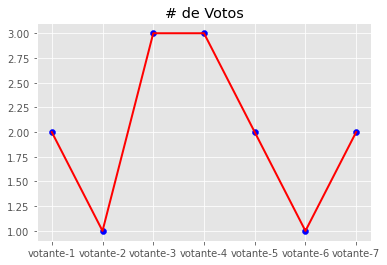

In [286]:
# Generamos la grafica
datos=sorted(votos.items()) # Ordenamos los datos
x, y =zip(*datos) #
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("# de Votos")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

En la simulacion podemos visualizar que la ganadora sería la candidata número dos correspondiente a **Lourdes Cuesta Orellana**, la que salío en nuestra regresión anteriormente realizada.

# CONCLUSIONES
El desarollo del presente trabajo me permitió poder expandir mis conocimientos sobre el funcionamiento de las regresiones y la utilidad de la mismas para poder predecir datos en el futuro, de las misma manera sobre la utilidad de la simulacion de eventos discretos para poder simular situaciones de la vida real.